In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
#finding counts of categorical variable
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.281226,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.699722,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
##Getting distribution of all variables 

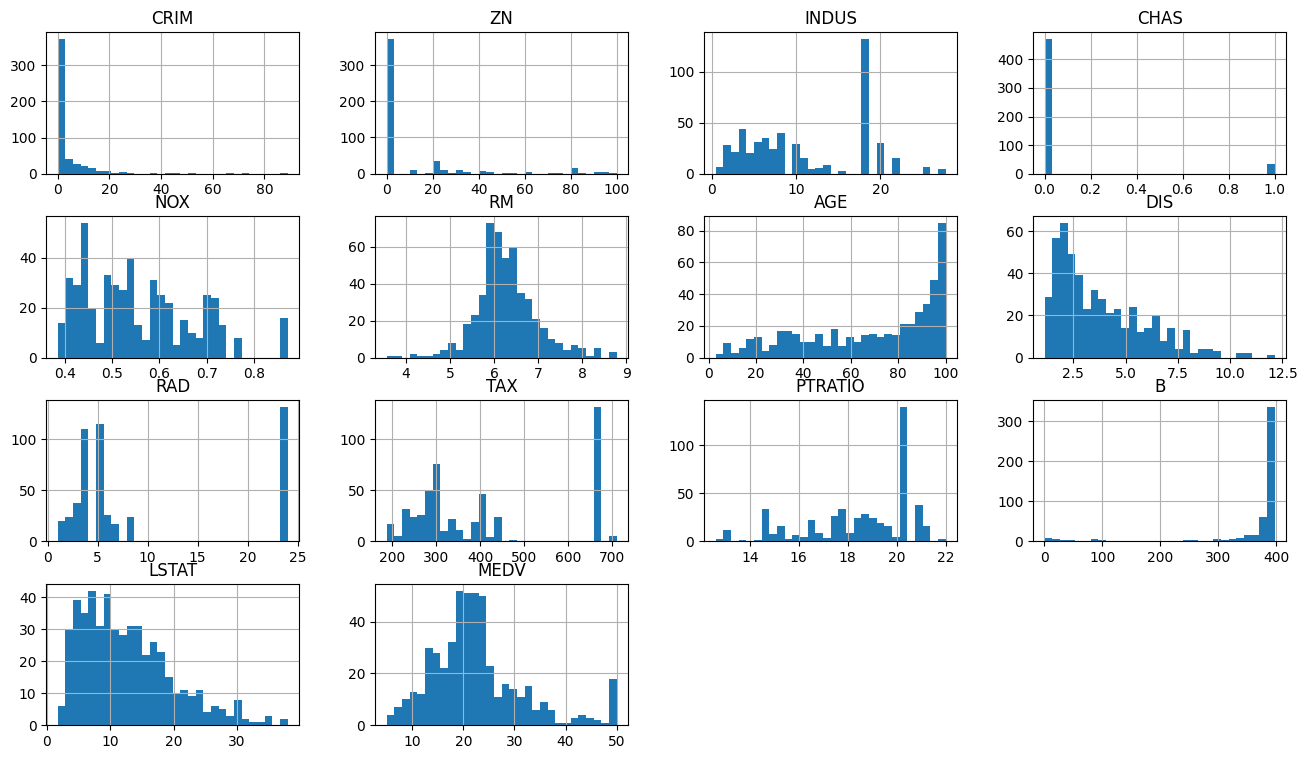

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins = 30, figsize = (16, 9))
plt.show()

In [9]:
X = housing.iloc[:, :-1].values
y = housing.iloc[:, -1].values
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 0)

In [10]:
print("size of X_train: ", train_set.shape)
print("size of X_test: ", test_set.shape)

size of X_train:  (404, 14)
size of X_test:  (102, 14)


In [11]:
#doing stratified shuffle split (unbiased split)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 0)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_train_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
24,0.75026,0.0,8.14,0,0.5380,5.924,94.1,4.3996,4,307,21.0,394.33,16.30,15.6
379,17.86670,0.0,18.10,0,0.6710,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
479,14.33370,0.0,18.10,0,0.6140,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
325,0.19186,0.0,7.38,0,0.4930,6.431,14.7,5.4159,5,287,19.6,393.68,5.08,24.6


In [14]:
housing = strat_train_set.copy()

In [15]:
#finding correlation 

In [16]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.717377
B          0.326640
ZN         0.295445
DIS        0.229198
CHAS       0.163718
AGE       -0.347770
RAD       -0.393081
CRIM      -0.395603
NOX       -0.415604
INDUS     -0.458890
TAX       -0.481014
PTRATIO   -0.505297
LSTAT     -0.739293
Name: MEDV, dtype: float64

In [17]:
#plotting correlations

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

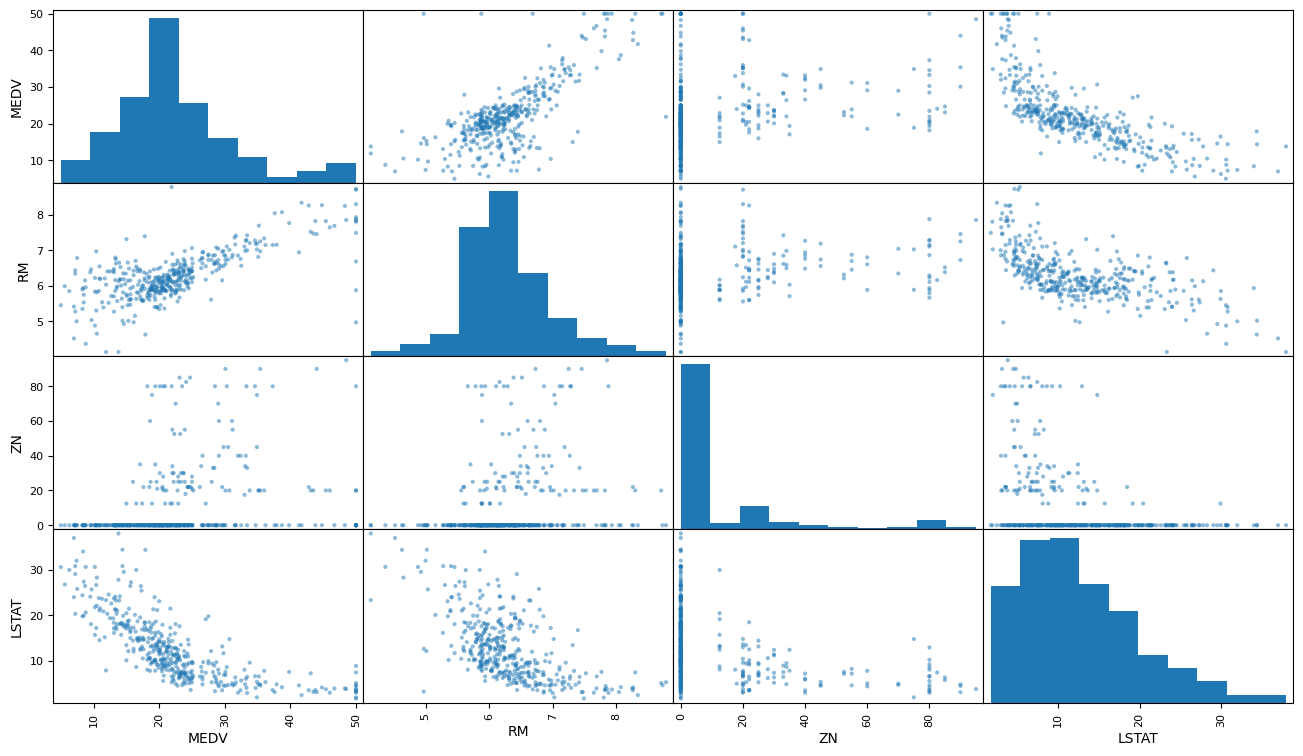

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (16,9))

<Axes: xlabel='RM', ylabel='MEDV'>

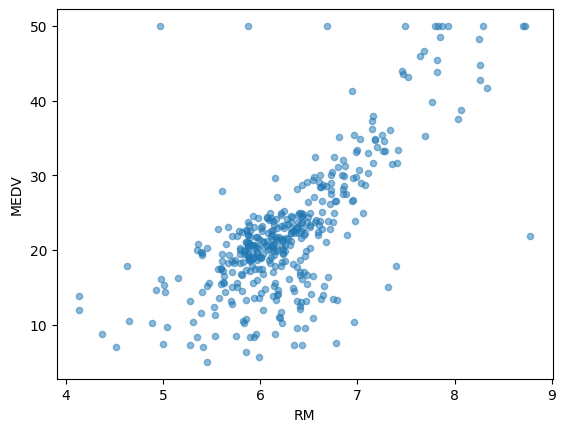

In [19]:
#viewing a particular correlation
housing.plot(kind = "scatter", x = "RM", y = "MEDV", alpha = 0.5)

In [20]:
#trying new combination of attributes

In [21]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0,30.405405
24,0.75026,0.0,8.14,0,0.5380,5.924,94.1,4.3996,4,307,21.0,394.33,16.30,15.6,51.823093
379,17.86670,0.0,18.10,0,0.6710,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2,107.022336
479,14.33370,0.0,18.10,0,0.6140,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4,106.919249
325,0.19186,0.0,7.38,0,0.4930,6.431,14.7,5.4159,5,287,19.6,393.68,5.08,24.6,44.627585


In [23]:
#finding new correlations 
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.717377
B          0.326640
ZN         0.295445
DIS        0.229198
CHAS       0.163718
AGE       -0.347770
RAD       -0.393081
CRIM      -0.395603
NOX       -0.415604
INDUS     -0.458890
TAX       -0.481014
PTRATIO   -0.505297
TAXRM     -0.570938
LSTAT     -0.739293
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

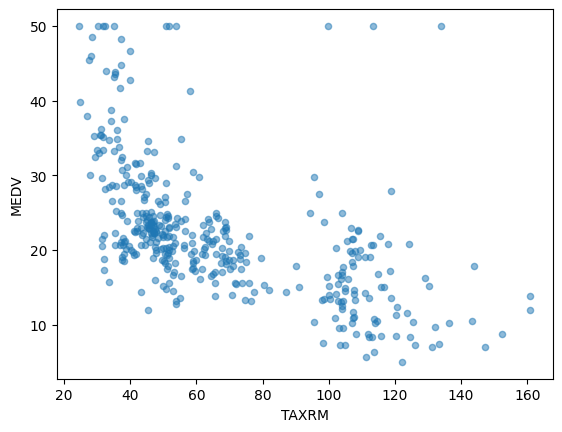

In [24]:
#viewing a particular correlation
housing.plot(kind = "scatter", x = "TAXRM", y = "MEDV", alpha = 0.5)

In [25]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000
mean,3.689672,10.553218,11.082698,0.069307,0.552945,6.289672,68.629703,3.835586,9.470297,404.675743,18.495297,360.000198,12.609653,22.356683,66.013220
std,8.832484,21.762399,6.747763,0.254290,0.114465,0.686958,27.744041,2.117322,8.576707,166.169489,2.148507,85.863735,7.125562,9.102181,30.452681
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.083437,0.000000,5.190000,0.000000,0.453000,5.884750,45.550000,2.102700,4.000000,281.000000,17.400000,376.092500,7.197500,17.075000,43.714951
50%,0.258750,0.000000,8.560000,0.000000,0.532000,6.205000,76.600000,3.298600,5.000000,330.000000,19.100000,391.385000,11.170000,21.050000,53.591417
75%,3.489463,12.500000,18.100000,0.000000,0.624000,6.616500,94.100000,5.218725,24.000000,666.000000,20.200000,396.157500,16.992500,25.000000,95.456553
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,160.947318


In [26]:
#imputing missing values smartly

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)
imputer.statistics_

array([2.58750000e-01, 0.00000000e+00, 8.56000000e+00, 0.00000000e+00,
       5.32000000e-01, 6.20500000e+00, 7.66000000e+01, 3.29860000e+00,
       5.00000000e+00, 3.30000000e+02, 1.91000000e+01, 3.91385000e+02,
       1.11700000e+01, 2.10500000e+01, 5.35914169e+01])

In [28]:
X = imputer.transform(housing)

In [29]:
housing_tr = pd.DataFrame(X, columns = housing.columns)

In [30]:
housing_tr.drop('TAXRM', axis = 1, inplace = True)

In [31]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.689672,10.553218,11.082698,0.069307,0.552945,6.288834,68.629703,3.835586,9.470297,404.675743,18.495297,360.000198,12.609653,22.356683
std,8.832484,21.762399,6.747763,0.254290,0.114465,0.683592,27.744041,2.117322,8.576707,166.169489,2.148507,85.863735,7.125562,9.102181
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083437,0.000000,5.190000,0.000000,0.453000,5.887250,45.550000,2.102700,4.000000,281.000000,17.400000,376.092500,7.197500,17.075000
50%,0.258750,0.000000,8.560000,0.000000,0.532000,6.205000,76.600000,3.298600,5.000000,330.000000,19.100000,391.385000,11.170000,21.050000
75%,3.489463,12.500000,18.100000,0.000000,0.624000,6.608500,94.100000,5.218725,24.000000,666.000000,20.200000,396.157500,16.992500,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
##creating a pipeline '''Everything about preprocessing done above should be done in the pipeline'''
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

myPipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])

In [33]:
housing_tr_new = myPipeline.fit_transform(housing_tr)

In [34]:
housing_tr_new

array([[-0.41604527,  0.31960611, -1.43969621, ...,  0.38760272,
        -0.64069431,  1.17076481],
       [-0.33320832, -0.48553026, -0.43664053, ...,  0.40031299,
         0.51854468, -0.74323512],
       [ 1.60709109, -0.48553026,  1.04123441, ...,  0.39343312,
         1.28856039, -1.3372351 ],
       ...,
       [ 2.52233886, -0.48553026,  1.04123441, ..., -2.71277105,
         1.97145754, -1.31523511],
       [-0.38528082, -0.48553026,  1.60359847, ...,  0.32743298,
         1.62298328, -0.91923512],
       [-0.39861069, -0.48553026, -0.20664995, ...,  0.43028125,
        -0.0842596 , -0.06123515]])

In [35]:
housing_tr_new.shape

(404, 14)

In [36]:
#training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(housing_tr_new[:, :14], housing_tr_new[:,13]) #col 15 is the label to predict

LinearRegression()

In [37]:
test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430,16.9,375.21,7.34,22.6
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77,8.3
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1
60,0.14932,25.0,5.13,0,0.453,5.741,66.2,7.2254,8,284,19.7,395.11,13.15,18.7
213,0.14052,0.0,10.59,0,0.489,6.375,32.3,3.9454,4,277,18.6,385.81,9.38,28.1


In [42]:
test_set.shape

(102, 14)

In [43]:
data = myPipeline.transform(test_set)
y_pred = regressor.predict(data[:, :14])

In [49]:
y_pred

array([ 0.03,  3.04,  0.07, -1.55, -0.13, -0.27, -0.19, -0.4 , -0.69,
       -0.41, -1.49, -0.57, -0.82, -1.3 ,  3.04,  0.73,  0.07,  1.2 ,
        0.77, -0.15,  0.16, -0.36, -0.22,  0.74, -0.34,  0.08, -0.3 ,
       -0.33,  1.8 , -0.4 , -0.85, -0.26, -0.2 , -0.25,  0.14, -0.61,
       -1.84,  3.04, -0.86, -1.  ,  0.17, -0.26, -0.28, -0.94, -0.64,
       -0.08, -0.23, -0.59, -1.16,  0.57, -0.74,  0.08,  0.21,  2.25,
       -0.74, -0.07, -0.58, -0.57, -0.81, -0.07, -0.41, -0.15,  1.18,
        1.01, -0.25,  0.82, -0.79, -0.81,  0.57,  0.03, -0.26, -0.11,
        0.13,  0.97,  0.15, -1.65,  2.85,  0.22,  0.03, -0.45,  0.1 ,
       -0.58,  0.61,  2.47,  3.04,  0.07, -0.11, -1.34,  0.1 ,  0.09,
       -0.38, -0.99, -0.05,  0.27, -1.15,  0.21, -0.94,  0.26, -0.91,
       -0.4 ,  0.63, -0.28])